In [289]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline 

In [290]:
df = pd.read_csv('201902-fordgobike-tripdata.csv')

#### Inspecting dataset

In [291]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [292]:
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


In [293]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

Seems like start_station_id, start_station_name, end_station_id, end_station_name, member_birth_year and member_gender have some missing values.

#### Identifying number of unique values. It helps to understand how many different sharings happened, how many locations and etc.

In [294]:
df.nunique()

duration_sec                 4752
start_time                 183401
end_time                   183397
start_station_id              329
start_station_name            329
start_station_latitude        334
start_station_longitude       335
end_station_id                329
end_station_name              329
end_station_latitude          335
end_station_longitude         335
bike_id                      4646
user_type                       2
member_birth_year              75
member_gender                   3
bike_share_for_all_trip         2
dtype: int64

In [295]:
df['time_of_day'] = df['start_time'].str[10:13]

In [296]:
df.head(2)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,time_of_day
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No,17
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No,18


#### Change duration to minutes

In [297]:
duration = ['duration_sec']
for x in duration:
    df[x] = df[x].apply(lambda x: x / 60)

In [298]:
df.head(2)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,time_of_day
0,869.750000,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No,17
1,708.683333,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No,18


#### Changing data types for start date and end date

In [299]:
df['start_time'] =  pd.to_datetime(df['start_time'], format='%Y%m%d %H:%M:%S')
df['end_time'] =  pd.to_datetime(df['end_time'], format='%Y%m%d %H:%M:%S')

#### Changing birthday year from integer to date

In [300]:
df['member_birth_year'] =  pd.to_datetime(df['member_birth_year'], format='%Y')

In [301]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             183412 non-null  float64       
 1   start_time               183412 non-null  datetime64[ns]
 2   end_time                 183412 non-null  datetime64[ns]
 3   start_station_id         183215 non-null  float64       
 4   start_station_name       183215 non-null  object        
 5   start_station_latitude   183412 non-null  float64       
 6   start_station_longitude  183412 non-null  float64       
 7   end_station_id           183215 non-null  float64       
 8   end_station_name         183215 non-null  object        
 9   end_station_latitude     183412 non-null  float64       
 10  end_station_longitude    183412 non-null  float64       
 11  bike_id                  183412 non-null  int64         
 12  user_type       

In [302]:
def histogram(size_x,size_y,data,axis,bins,x_label,y_label,title):
    plt.figure(figsize=(size_x,size_y))
    plt.hist(data=data,x=axis,bins=bins)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title);

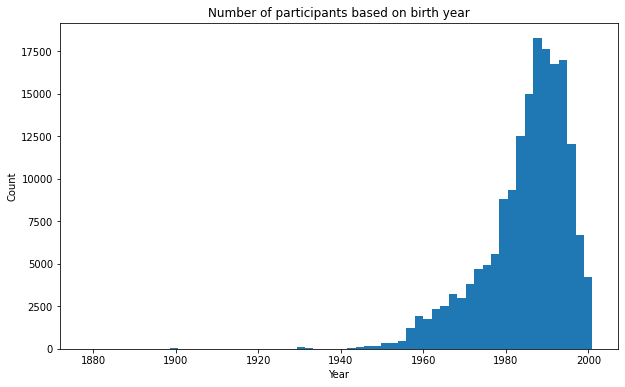

In [303]:
histogram(10,6,df,'member_birth_year',60,'Year','Count',
          'Number of participants based on birth year')

Histogram shows interesting fact that soje paticipants are born in 19th century. This seems as an error because even if people are still alive they won't be able to participate in race at about 120 years of age. Same applies to people born in around 1930. As expected this histogram is left skewed but that makes perfect sense.

#### Info function showed gender to be 3 options. Plotting bar charts to see distrubution between these options

In [304]:
def countbar(data,axis,x_label,title):
    color = sns.color_palette()[0]

    freq = data[axis].value_counts()
    gen_order = freq.index

    sns.countplot(data=data,x=axis,color=color,order=gen_order)

    plt.title(title)
    plt.xlabel(x_label);

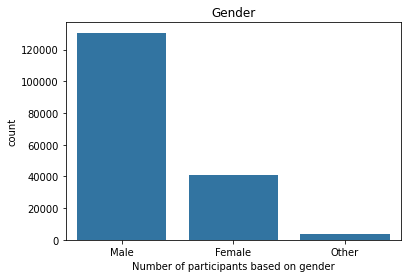

In [305]:
countbar(df,'member_gender','Number of participants based on gender','Gender')

Vast majority of participants are male which is over 120k. There area about 3 times fewer female participants. Where unidentified accounts for just a very small faction.

#### Checking for distrubution between customers and subscribers

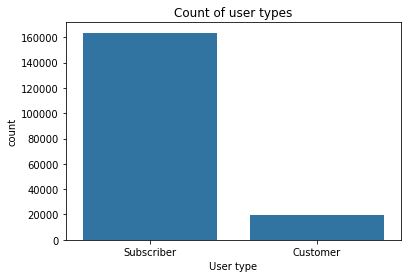

In [306]:
countbar(df,'user_type','User type','Count of user types')

Clearly most of bike sharing users are subcription based clients

#### Extracting weekday from start time of the ride

In [307]:
df['week_day_start_trip'] = df['start_time'].dt.dayofweek

In [308]:
week_day = ['week_day_start_trip']
weekday_number = [0,1,2,3,4,5,6]
weekday_name = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']

for x in week_day:
    df[x] = df[x].replace(weekday_number,weekday_name)

#### Plotting number of rides based on weekday

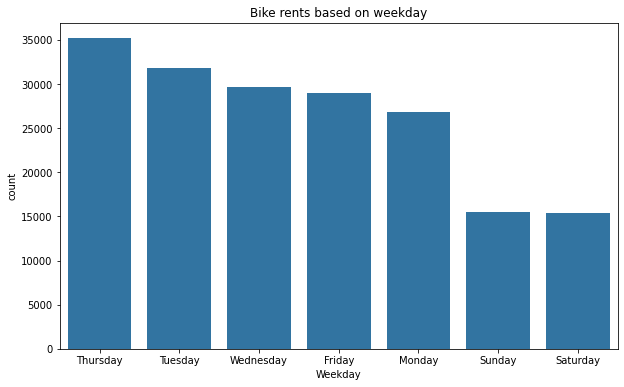

In [309]:
plt.figure(figsize=(10,6))
countbar(df,'week_day_start_trip','Weekday','Bike rents based on weekday')

Seems like most bike rents happen on Thursdays followed by Tuesday. Weekends are least popular among bike sharers.

#### Plotting bike sharing during the day based on hour

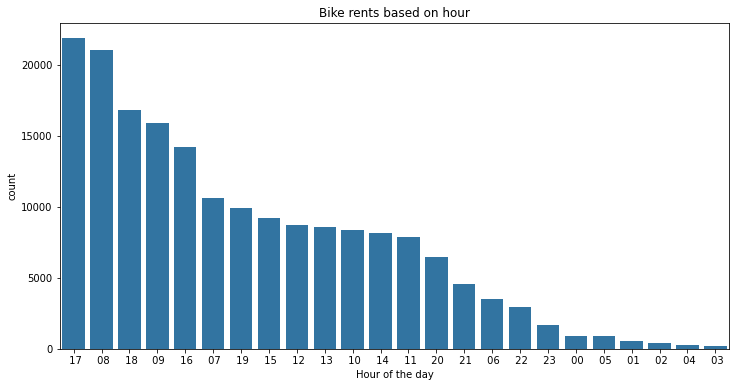

In [310]:
plt.figure(figsize=(12,6))
countbar(df,'time_of_day','Hour of the day','Bike rents based on hour')

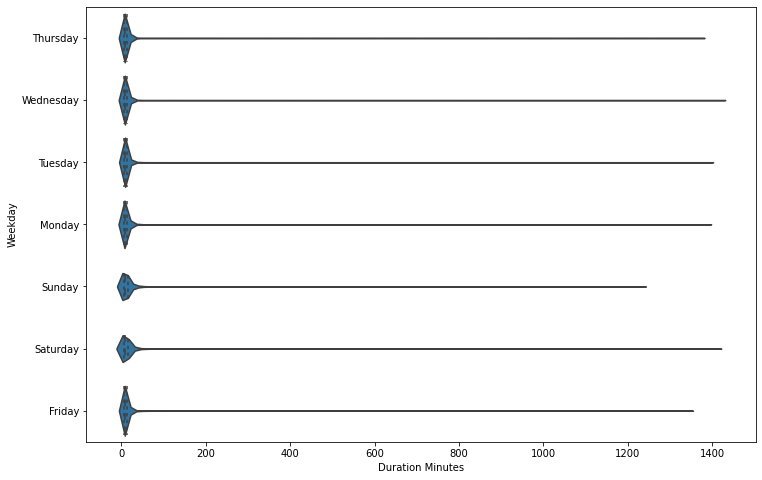

In [318]:
plt.figure(figsize=(12,8))
sns.violinplot(data=df,y='week_day_start_trip',x='duration_sec',color=color,inner = 'quartile')
plt.xlabel('Duration Minutes')
plt.ylabel('Weekday');

Full of outliers vilion chart. Clearly most are short trips but plenty of long trip outliers exist.

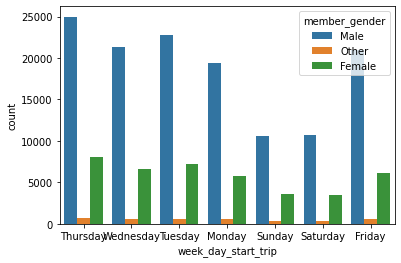

In [320]:
sns.countplot(data = df, x = 'week_day_start_trip', hue = 'member_gender');

In [323]:
cat_counts = df.groupby(['week_day_start_trip', 'member_gender']).size()
cat_counts = cat_counts.reset_index(name='count')

In [326]:
cat_counts = cat_counts.pivot(index='week_day_start_trip',
                              columns = 'member_gender',values='count')

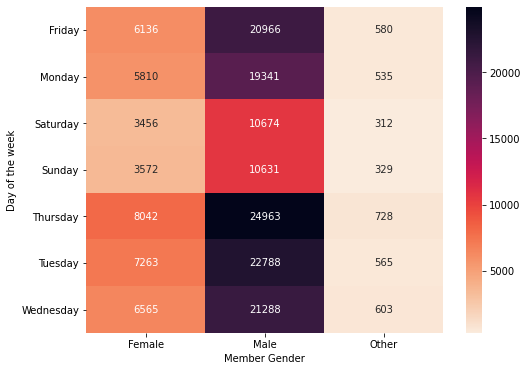

In [357]:
plt.figure(figsize=(8,6))
sns.heatmap(cat_counts,annot=True,fmt='d',cmap='rocket_r')
plt.xlabel('Member Gender')
plt.ylabel('Day of the week')
plt.yticks(rotation=0);